In [1]:
from imports import *
%matplotlib inline

## Practicing with DataArray ##

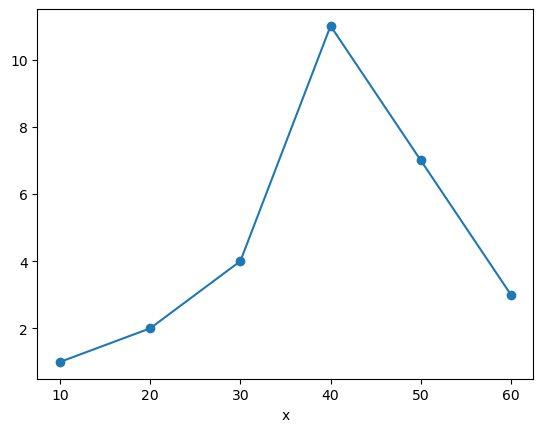

In [2]:
da = xr.DataArray([1,2,4,11,7,3], 
                  dims = ['x'],
                  coords={'x': [10, 20, 30, 40, 50, 60]})

# da.indexes
da.plot(marker = 'o')

### Multidimensional DataArray ###

In [3]:
## Importing multidimensional ARGO data 
url = 'https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip'
files = pooch.retrieve(url, processor = pooch.Unzip(), known_hash = "2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files.sort()

## Manually load the files into separate nmupy array variables
## There are 7 different sets of data. This is inefficient, but still
## working towards using Datasets fully
pressure = np.load(files[0])
salinity = np.load(files[1])
temp = np.load(files[2])
date = np.load(files[3])
lat = np.load(files[4])
levels = np.load(files[5])
lon = np.load(files[6])


#### Messing with the salinity data ####

In [4]:
da_salinity = xr.DataArray(salinity, 
                           dims = ['level', 'date'],
                           coords={'level':levels,
                                   'date':date},)
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...

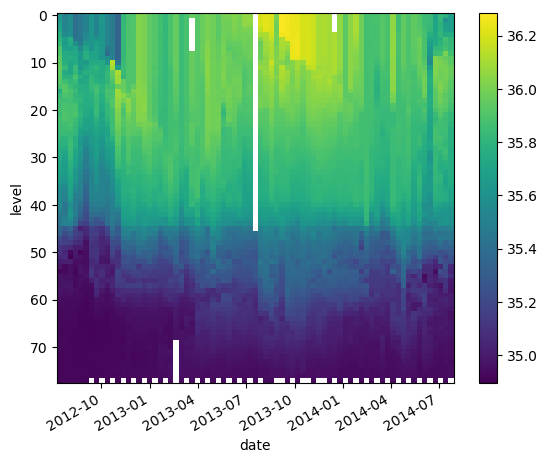

In [5]:
## PLotting the data, yincrease set to false, so the depth (level variable I think?) is more
## visually intuitive
da_salinity.plot(yincrease = False)

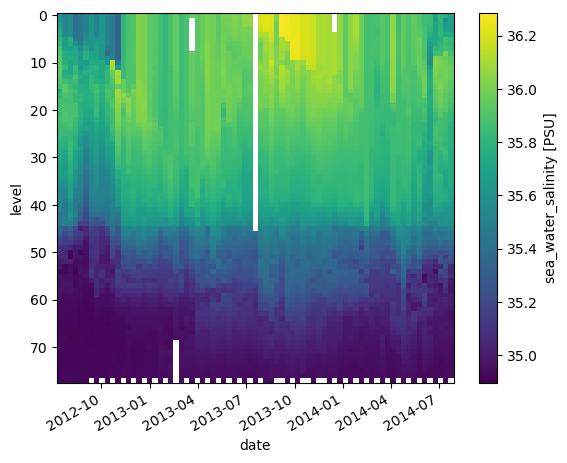

In [6]:
## Adding additional attribute data
da_salinity.attrs['units'] = 'PSU' # practical salinity unit, equiv to g/kg or ppt
da_salinity.attrs['standard_name'] = 'sea_water_salinity'

## Revises the plot automatically
da_salinity.plot(yincrease = False)

## Practice  with Dataset ##

In [7]:
## Using temperature, salinity, and pressure data to form a Dataset
argo = xr.Dataset(
    data_vars={
        'salinity': (('level', 'date'), salinity),
        'temperature': (('level', 'date'), temp),
        'pressure': (('level', 'date'), pressure)
    },
    coords = {
        'level': levels,
        'date': date
    }
)
argo

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

In [8]:
# Add in lon and lat after the fact, and give dimension of date to each of them
argo.coords['lon'] = ('date', lon)
argo.coords['lat'] = ('date', lat)
argo

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

## Selecting Data (Indexing) ##

In [9]:
## This selects for the salinity data across a range of dates (and locations)
## limited at a certain depth, that is level 2 
## (I don't actually know what the levels correspond to in meters)
argo.salinity[2]

<xarray.DataArray 'salinity' (date: 75)>
array([35.6819458 , 35.52595901, 35.57297134, 35.40494537, 35.45091629,
       35.50192261, 35.62397766, 35.51696014, 35.62797546, 35.52292252,
       35.47383118, 35.33785629, 35.81896591, 35.88694   , 35.90187836,
       36.02391815, 36.00475693, 35.94187927, 35.91583252, 35.86392212,
       35.81995392, 35.88601303, 35.95079422, 35.84091568, 35.87992477,
               nan, 35.92179108, 35.96979141, 36.0008316 , 35.98083115,
       35.92887878, 35.98091888, 35.9838829 , 36.01884842, 35.99092484,
       36.04689026, 36.04185867,         nan, 36.19193268, 36.22789764,
       36.20986557, 35.97589874, 36.2779007 , 36.25889969, 36.2418251 ,
       36.23685837, 36.19781876, 36.19785309, 36.17692184, 36.1048851 ,
       36.11392212, 36.09080505,         nan, 36.05675888, 35.93374634,
       36.04291534, 36.10183716, 35.97779083, 35.86592102, 35.87791824,
       35.88392258, 35.92078781, 35.88601303, 36.05178833, 35.85883713,
       35.94878769, 35.8938446 , 35.94379425, 35.90884018, 35.84893036,
       35.83496857, 35.71691132, 35.79592896, 35.66290665, 35.66591263])
Coordinates:
    level    int64 2
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

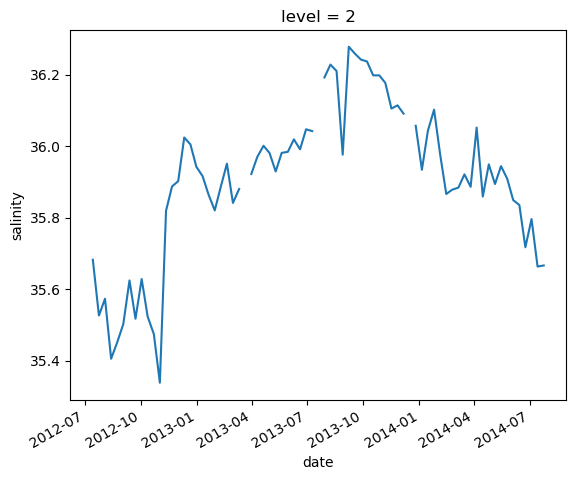

In [10]:
# Use built in plot feature to automatically plot the salinity over the 
# given time frame at a depth of level 2
argo.salinity[2].plot()

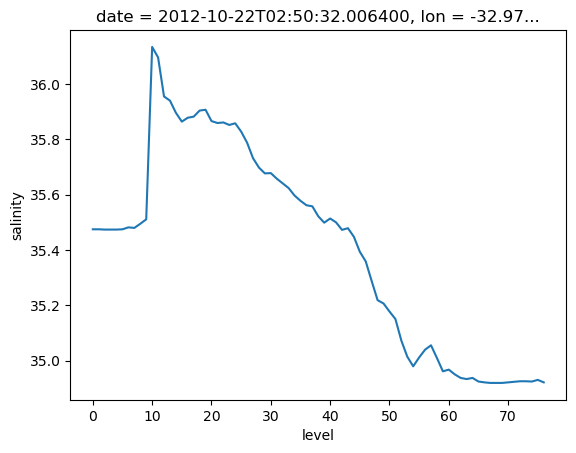

In [11]:
## Select for all levels (all depths, level 0 to 77)
## Select the 10th index for date, that is 2012-10-22...
## It will also select for the specific associated longitude and latitude where this measurement was taken
argo.salinity[:, 10]

## Now plot the result
## Note that this plot is accurate, but the axes are not necessarily the most sensical
argo.salinity[:, 10].plot()

Better practice: use xarray's `.sel()` method. It allows for much more explicit label based indexing, making both the code and the process clearer.

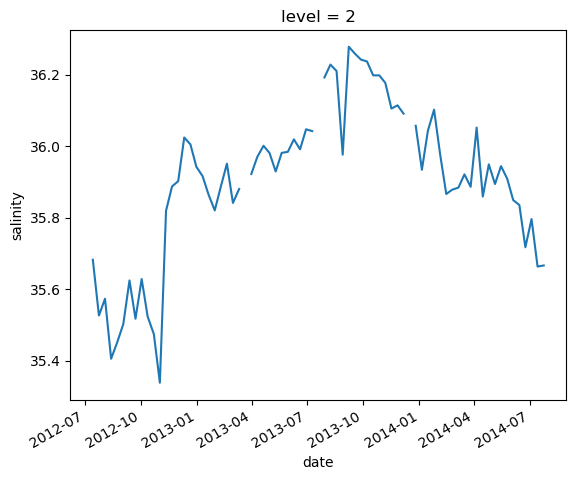

In [12]:
## Same effect as argo.salinity[2], much clearer
argo.salinity.sel(level = 2)
## Plotting
argo.salinity.sel(level=2).plot()

Text(0.5, 1.0, 'Date: 2012-10-22')

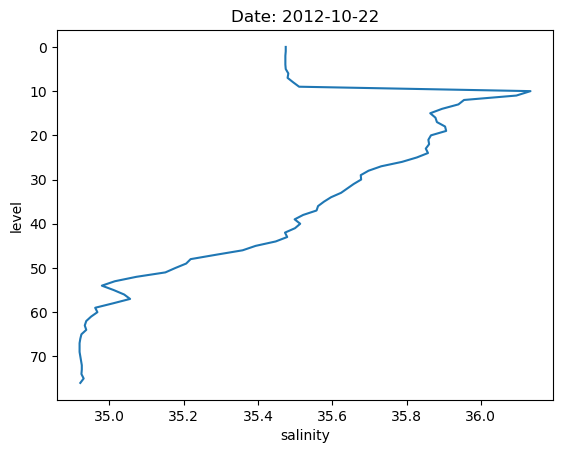

In [13]:
## Same effect as argo.salinity[:,10]
argo.salinity.sel(date = '2012-10-22')

## Plotting with modified axes
argo.salinity.sel(date = '2012-10-22').plot(y='level', yincrease=False)
plt.title('Date: 2012-10-22')


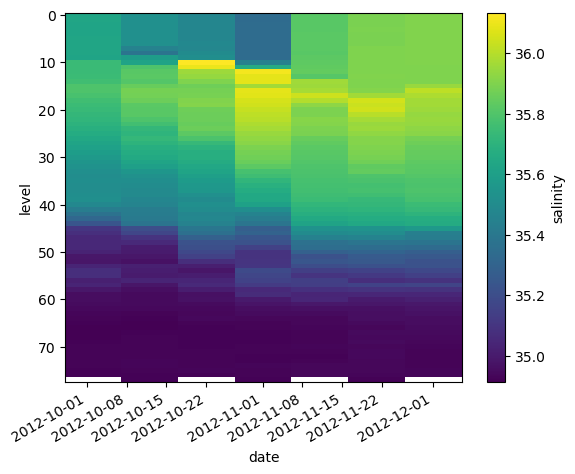

In [14]:
## Also works with slicing, awkward syntax
## Selecting all salinity measurements (across all depths) from Oct 1, 2012 to Dec 1, 2012
sliceEx = argo.salinity.sel(date = slice('2012-10-01','2012-12-01'))
## Plotting
sliceEx.plot(yincrease = False)

In [15]:
## Also works on an entire Dataset
argo.sel(date = '2012-10-22')

<xarray.Dataset>
Dimensions:      (level: 78, date: 1)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-10-22T02:50:32.006400
    lon          (date) float64 -32.97
    lat          (date) float64 44.13
Data variables:
    salinity     (level, date) float64 35.47 35.47 35.47 ... 34.93 34.92 nan
    temperature  (level, date) float64 17.13 17.13 17.13 ... 3.736 3.639 nan
    pressure     (level, date) float64 6.4 10.3 15.4 ... 1.9e+03 1.951e+03 nan

## Computation ##

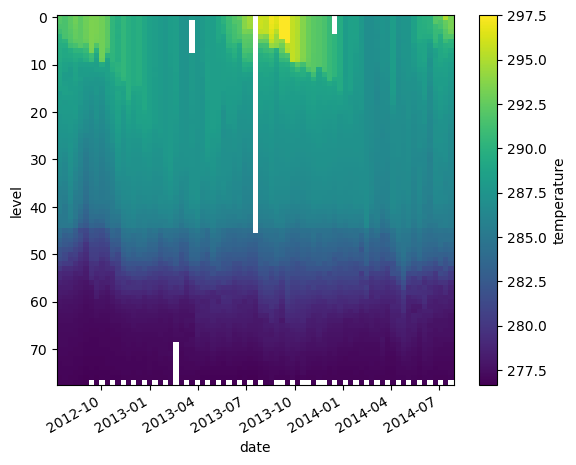

In [16]:
## Datasets work well with arithmetic operators and combinatons
temp_kelvin = argo.temperature + 273.15 # convert from C to K
temp_kelvin.plot(yincrease = False)

## Braodcasting, Alginment, and Combining Data ##

### Broadcasting ###

(78,)
(75,)


<xarray.DataArray (level: 78, date: 75)>
array([[   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [  47.187,   46.716,   46.45 , ...,   42.601,   42.457,   42.379],
       [  94.374,   93.432,   92.9  , ...,   85.202,   84.914,   84.758],
       ...,
       [3539.025, 3503.7  , 3483.75 , ..., 3195.075, 3184.275, 3178.425],
       [3586.212, 3550.416, 3530.2  , ..., 3237.676, 3226.732, 3220.804],
       [3633.399, 3597.132, 3576.65 , ..., 3280.277, 3269.189, 3263.183]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

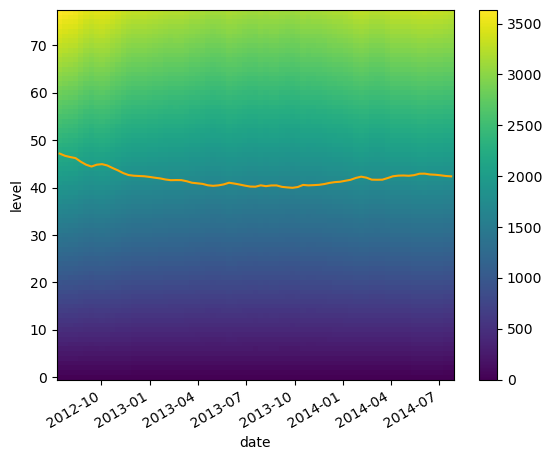

In [17]:
## Just demonstrating the broadcasting potential
print(argo.level.shape)
print(argo.lat.shape)

level_times_lat = argo.level * argo.lat

## Plotting for a visiual
argo.lat.plot(color = 'orange')
level_times_lat.plot()

level_times_lat

### Alignment ###

In [18]:
## Create some subsets of data
## Both some shapes, different slices
sa_surf = argo.salinity.isel(level=slice(0,20))
sa_mid = argo.salinity.isel(level=slice(10,30))

## Default it will be an inner join (intersection)
## will only use overlapping data coords (i.e 10 through twenty)
(sa_surf * sa_mid).level

<xarray.DataArray 'level' (level: 10)>
array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
Coordinates:
  * level    (level) int64 10 11 12 13 14 15 16 17 18 19

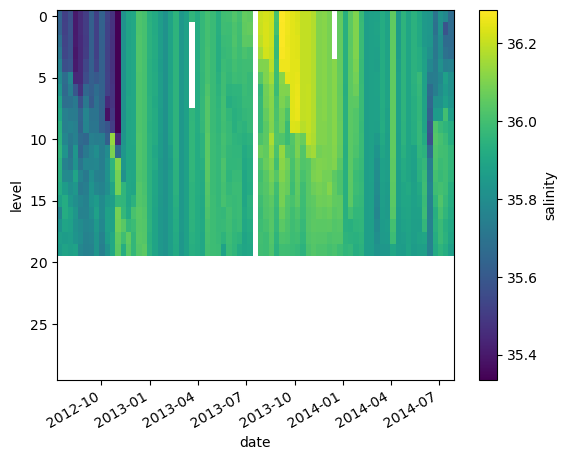

In [19]:
## We can manually do an outer join (union)
sa_surf_outer, sa_mid_outer = xr.align(sa_surf, sa_mid, join = 'outer')
sa_surf_outer.plot(yincrease = False)

### Combining Data: Concat and Merge ###

* `xr.concat` to concatenate multiple arrays together, basically just tacks them together without checking for alignment
* `xr.merge` combines multiple arrays into a dataset while accounting for overlapping coords/dimensions

<xarray.DataArray 'salinity' (level: 40, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [35.78895187, 35.7829895 , 35.85100555, ..., 35.84291458,
        35.81891251, 35.7779007 ],
       [35.76794815, 35.75598526, 35.84500504, ..., 35.84891891,
        35.83391571, 35.76390076],
       [35.75194168, 35.71097565, 35.83100128, ..., 35.80690765,
        35.85292053, 35.75489807]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38
<

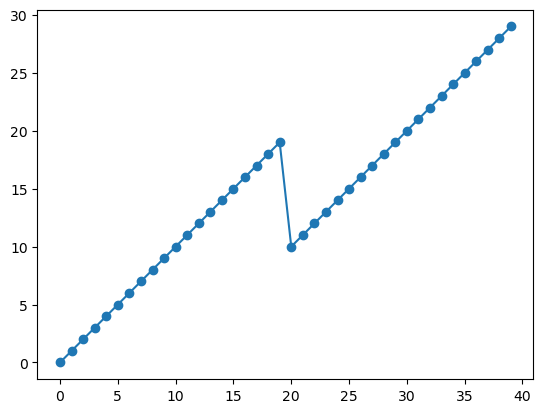

In [20]:
## Concat the two partial arrays from before into a larger one
## Along the 'level' dimension
sa_surf_mid = xr.concat([sa_surf, sa_mid], dim = 'level')
print(sa_surf_mid)

## This didn't account for overlapping coordinates along the dimension
print(sa_surf_mid.level)

## Plotting the overlap
plt.plot(sa_surf_mid.level.values, marker = 'o')


In [21]:

## We can also concat along a new dimension, this will combine the two arrays
## creating a new dimension that traverses along the arrays
sa_concat_new = xr.concat([sa_surf, sa_mid], dim = 'newdim')
sa_concat_new

<xarray.DataArray 'salinity' (newdim: 2, level: 30, date: 75)>
array([[[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
         35.77793884, 35.66891098],
        [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
         35.58389664, 35.66791153],
        [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
         35.66290665, 35.66591263],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [35.78895187, 35.7829895 , 35.85100555, ..., 35.84291458,
         35.81891251, 35.7779007 ],
        [35.76794815, 35.75598526, 35.84500504, ..., 35.84891891,
         35.83391571, 35.76390076],
        [35.75194168, 35.71097565, 35.83100128, ..., 35.80690765,
         35.85292053, 35.75489807]]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38
Dimensions without coordinates: newdim

In [22]:
## Merge allows for combination of data sets withoutout duplication where they overlap
sa_merge = xr.merge([sa_surf, sa_mid])
sa_merge

<xarray.Dataset>
Dimensions:   (level: 30, date: 75)
Coordinates:
  * level     (level) int64 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29
  * date      (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24...
    lon       (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat       (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38
Data variables:
    salinity  (level, date) float64 35.64 35.51 35.57 35.4 ... 35.81 35.85 35.75

In [23]:
## Merge works with dataArrays and Datasets, for both, it will return 
xr.merge([argo.salinity, argo.temperature])

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan

Use join keyword to modify the merge align, join `({"outer", "inner", "left", "right", "exact", "override"}, default: "outer")` – String indicating how to combine differing indexes in objects.

* “outer”: use the union of object indexes

* “inner”: use the intersection of object indexes

* “left”: use indexes from the first object with each dimension

* “right”: use indexes from the last object with each dimension

* “exact”: instead of aligning, raise ValueError when indexes to be aligned are not equal

* “override”: if indexes are of same size, rewrite indexes to be those of the first object with that dimension. Indexes for the same dimension must have the same size in all objects.

In [24]:
## It also auto aligns the data
xr.merge([argo.salinity.sel(level=slice(0,30)), argo.temperature.sel(level=slice(30,None))])


<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan nan nan
    temperature  (level, date) float64 nan nan nan nan ... 3.728 nan 3.714 nan

## Reductions ##

In [25]:
## Reductions are very useful for finding descriptive statistics and measurements
## Just like numpy they can be preformed along a variety of axes
print(argo.temperature.mean(axis=0)) # Along the level access, an average salinity across all ocean levels each day

print(argo.temperature.mean(axis=1)) # More useful, an average salinity at each level across all dates

<xarray.DataArray 'temperature' (date: 75)>
array([10.88915385, 10.7282564 , 10.9336282 , 10.75679484, 10.38166666,
       10.08619236, 10.58194804, 10.50066671, 10.56841555, 10.53705122,
       10.81131168, 11.01932052, 11.39205196, 11.40823073, 11.3642208 ,
       11.35821797, 11.39444157, 11.10514098, 11.02870125, 10.80894868,
       10.93076625, 11.01069231, 11.88195654, 10.57373078, 10.66359736,
       10.56573237, 11.08854546, 10.87921792, 11.21384416, 11.24991028,
       11.29168825, 11.06203848, 11.32829864, 11.20401279, 11.25300001,
       11.32106403, 11.40112986,  6.07053117, 11.7748052 , 11.7466795 ,
       12.03732056, 11.92653251, 12.08844156, 12.20543591, 12.23402598,
       12.03365387, 11.9919221 , 11.92087012, 11.84273071, 11.79711684,
       11.7895325 , 11.55385894, 11.19083561, 11.266282  , 11.0611948 ,
       11.0307179 , 11.06566232, 10.79799995, 10.787     , 10.41173077,
       10.44170127, 10.32649998, 10.38242857, 10.88080769, 10.86177921,
       10.98787178, 

In [26]:
## Best practice to use dimension labels instead of axes
## Also works across Datasets or DataArrays
argo_mean = argo.mean(dim = 'date')
argo_mean # mean of all measurements averaged across the ~2 years of measurements

<xarray.Dataset>
Dimensions:      (level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level) float64 35.91 35.9 35.9 35.9 ... 34.94 34.94 34.93
    temperature  (level) float64 17.6 17.57 17.51 17.42 ... 3.789 3.73 3.662
    pressure     (level) float64 6.435 10.57 15.54 ... 1.95e+03 1.999e+03

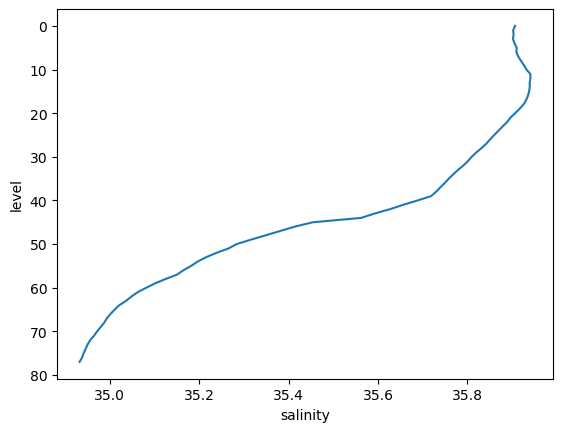

In [27]:
## Plotting and visualizing
argo_mean.salinity.plot(y = 'level', yincrease = False)

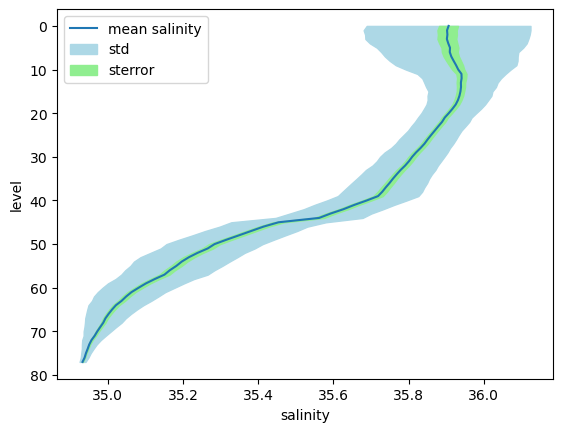

In [28]:
## Works for other statistics too, standard deviation is very useful
argo_std = argo.std(dim = 'date')
argo_ste = argo_std.salinity/np.sqrt(argo.date.size)


## Plotting mean with standard deviation
argo_mean.salinity.plot(y = 'level', yincrease = False, label = 'mean salinity')
plt.fill_betweenx(argo_mean.level, argo_mean.salinity + argo_std.salinity, argo_mean.salinity - argo_std.salinity, color = 'lightblue', label = 'std')
plt.fill_betweenx(argo_mean.level, argo_mean.salinity + argo_ste, argo_mean.salinity - argo_ste, color = 'lightgreen', label = 'sterror')
plt.legend()

## Weighted Reductions ##

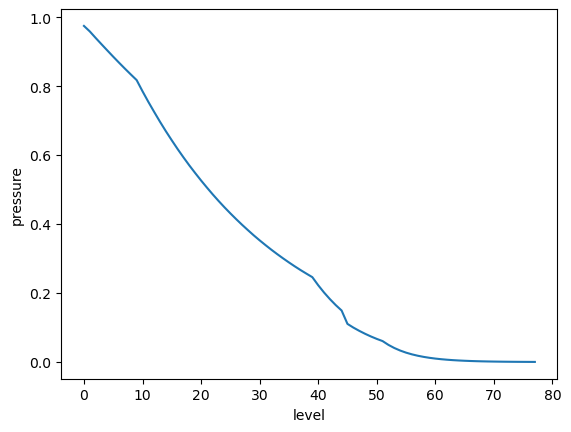

In [29]:
## Say we want to weight with respect to the pressure (it will then also be generally proportional to ocean depth)
mean_pressure = argo.pressure.mean(dim = 'date')
p0 = 250 #dbat #don't know what this is lol
weights = np.exp(-mean_pressure/p0)
weights.plot()

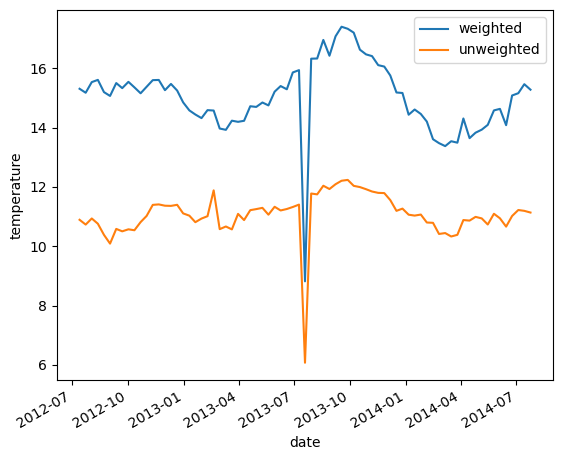

In [30]:
## Using these weights we can then calculate the weighted temperature
temp_weighted_mean = argo.temperature.weighted(weights).mean(dim = 'level')
temp_weighted_mean.plot(label = 'weighted')
argo.temperature.mean(dim = 'level').plot(label = 'unweighted')
plt.legend()

## Accessing netCDF Files ##

In [31]:
## Accessing Practice Data from NASA GISTemp Global Temperature Anomaly Dataset
gisdata = pooch.retrieve('https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz',
    known_hash = None,
    processor=pooch.Decompress(),)

# Converting to an xarray object, gissdata is currently a netCDF
ds = xr.open_dataset(gisdata)
ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1721, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-05-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-06-12 11:10:33 by SBBX_to_nc 2.0 - ILAND=1200,...

/var/folders/2d/t7gy2rhs3fn_fgvstmnfq9480000gn/T/ipykernel_34208/2064659366.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


<Axes: title={'center': 'time = 2023-05-15'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

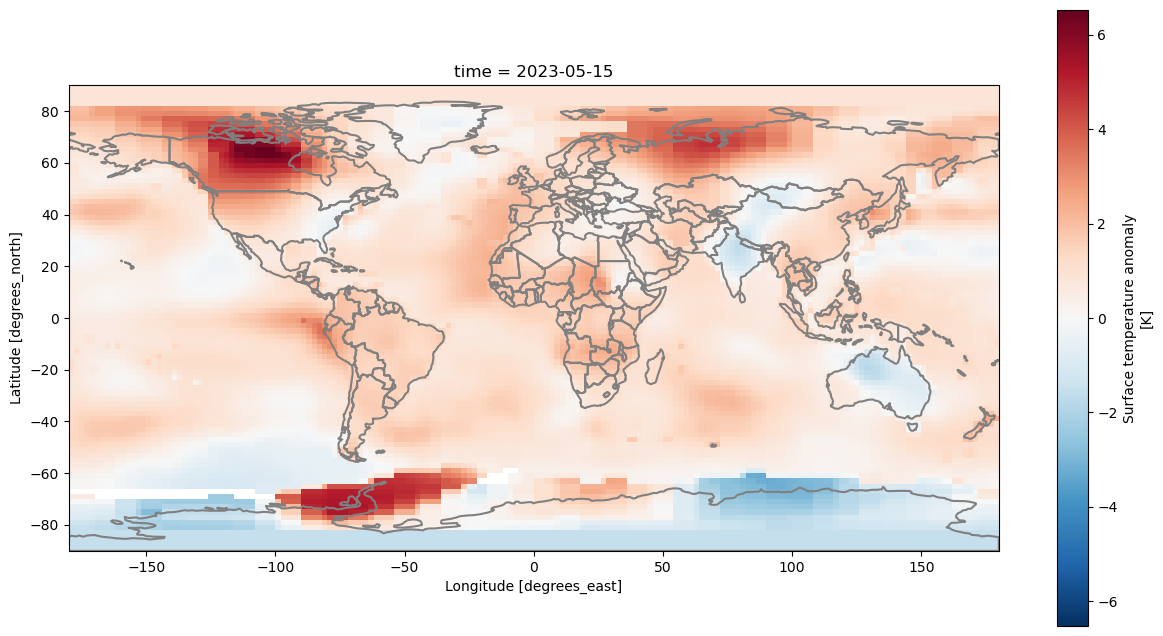

In [62]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize = (15,8))

ds.tempanomaly.isel(time=-1).plot(ax = ax)
countries.boundary.plot(color = 'gray', ax = ax)


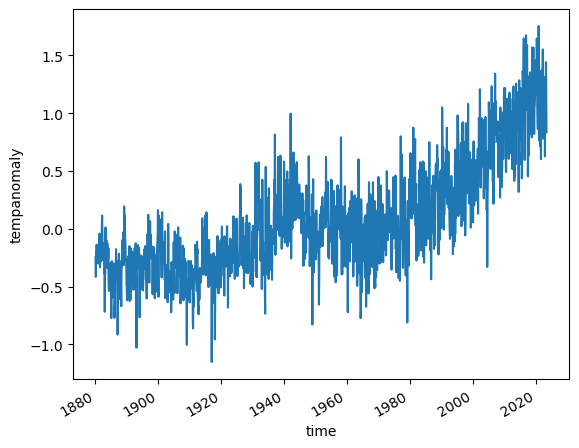

In [63]:
## Find an average global temperature for each year
ds.tempanomaly.mean(dim = ('lon', 'lat')).plot()